## Evaluation: System Vs Expert Rankings

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
# System result
df_system = pd.read_csv('system_ranking.csv')

### Comparing system result with human evaluator result

In [33]:
# Calculate system_rank
df1 = df_system[['Filename', 'total_score']].sort_values(by='total_score', ascending=False).copy()
df1['rank'] = df1['total_score'].rank(ascending=False, method='min').astype(int)
df1

,Filename,total_score,rank
4,Hari_Tiwari,0.844399,1
5,Ilias,0.793873,2
0,Albana,0.771282,3
14,Winston_Rosenberg,0.762581,4
7,Jeong_Kim,0.653149,5
2,First_Last,0.641881,6
10,Ramika_Shrestha,0.614229,7
3,Hari_Tamang,0.562104,8
11,Ram_Adhikari,0.540086,9
13,SP,0.499368,10


In [34]:
df2 = pd.read_csv('expert_rank.csv')

In [35]:
df2

,Filename,total_score,system_rank,expert_rank_1,expert_rank_2,expert_rank_3
0,Hari,0.844399,1,1,1,1
1,Ilias,0.793873,2,3,3,4
2,Albana,0.771282,3,4,4,3
3,Winston,0.762581,4,2,2,2
4,Jeong,0.653149,5,6,5,6
5,Fred,0.641881,6,5,6,5
6,Ramika,0.614229,7,8,7,8
7,Tamang,0.562104,8,7,10,9
8,Ram,0.540086,9,11,11,10
9,SP,0.499368,10,9,8,7


In [36]:
df1 = df2.copy()

In [37]:
# Assuming df1 is your DataFrame containing the combined expert ranks
expert_columns = ['expert_rank_1', 'expert_rank_2', 'expert_rank_3']

ranked_df = df1.copy()

# Calculate the average rank across all expert columns
ranked_df['combined_expert_rank'] = df1[expert_columns].mean(axis=1)

# Sort the copied DataFrame by the combined expert rank
ranked_df = ranked_df.sort_values(by='combined_expert_rank')

# Calculate rank based on sorted order
ranked_df['combined_rank'] = range(1, len(ranked_df) + 1)

df1['combined_expert_rank'] = ranked_df['combined_rank']

In [38]:
df1

,Filename,total_score,system_rank,expert_rank_1,expert_rank_2,expert_rank_3,combined_expert_rank
0,Hari,0.844399,1,1,1,1,1
1,Ilias,0.793873,2,3,3,4,3
2,Albana,0.771282,3,4,4,3,4
3,Winston,0.762581,4,2,2,2,2
4,Jeong,0.653149,5,6,5,6,6
5,Fred,0.641881,6,5,6,5,5
6,Ramika,0.614229,7,8,7,8,7
7,Tamang,0.562104,8,7,10,9,9
8,Ram,0.540086,9,11,11,10,11
9,SP,0.499368,10,9,8,7,8


## Plots

### Line chart

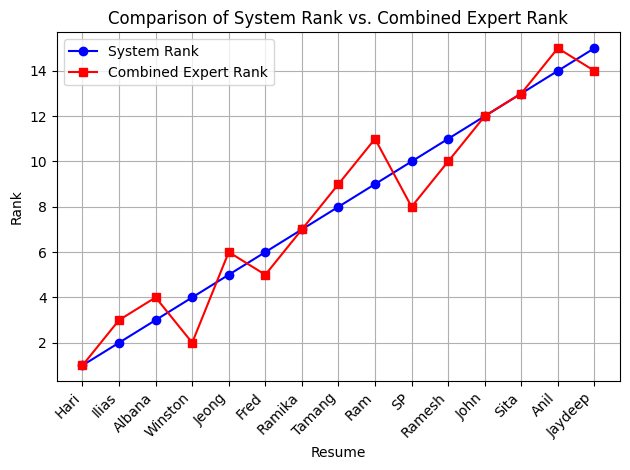

In [39]:
# Assuming df1 is your DataFrame containing resume filenames and ranks
plt.plot(df1['Filename'], df1['system_rank'], marker='o', label='System Rank', color='b')
plt.plot(df1['Filename'], df1['combined_expert_rank'], marker='s', label='Combined Expert Rank', color='r')
plt.xlabel('Resume')
plt.ylabel('Rank')
plt.title('Comparison of System Rank vs. Combined Expert Rank')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

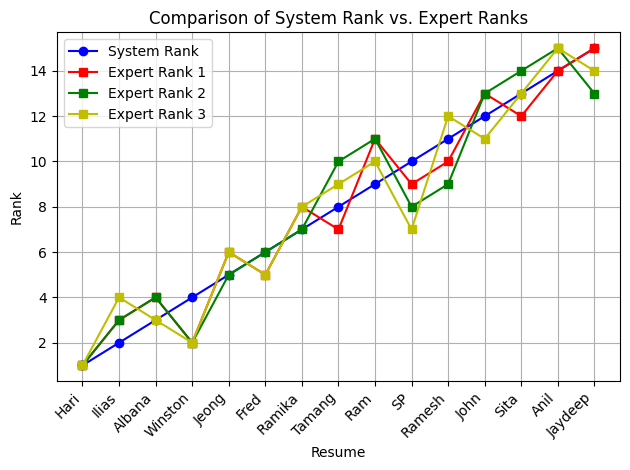

In [40]:
# Assuming df1 is your DataFrame containing resume filenames and ranks
plt.plot(df1['Filename'], df1['system_rank'], marker='o', label='System Rank', color='b')
plt.plot(df1['Filename'], df1['expert_rank_1'], marker='s', label='Expert Rank 1', color='r')
plt.plot(df1['Filename'], df1['expert_rank_2'], marker='s', label='Expert Rank 2', color='g')
plt.plot(df1['Filename'], df1['expert_rank_3'], marker='s', label='Expert Rank 3', color='y')
plt.xlabel('Resume')
plt.ylabel('Rank')
plt.title('Comparison of System Rank vs. Expert Ranks')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


### Bar chart

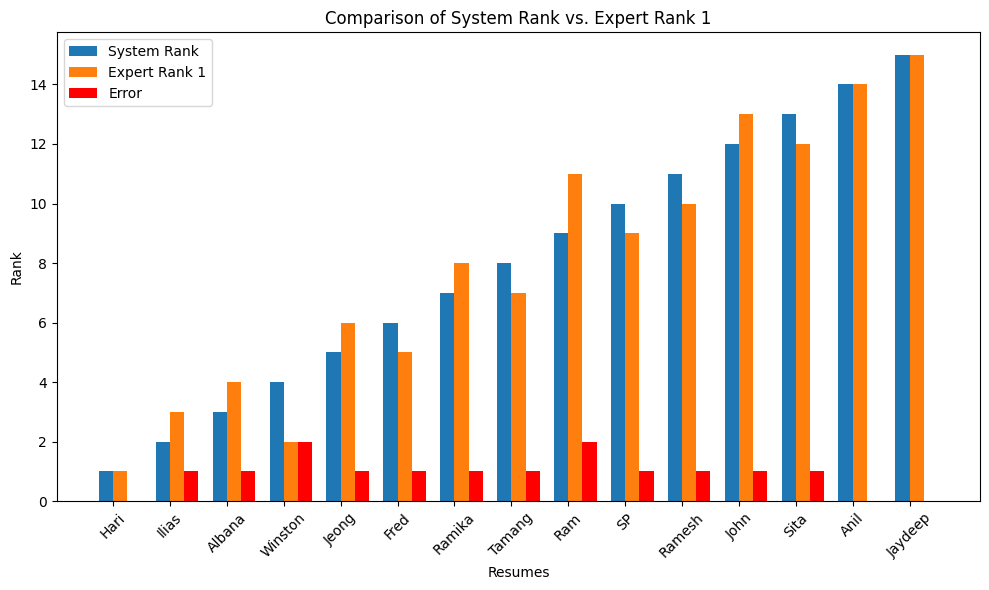

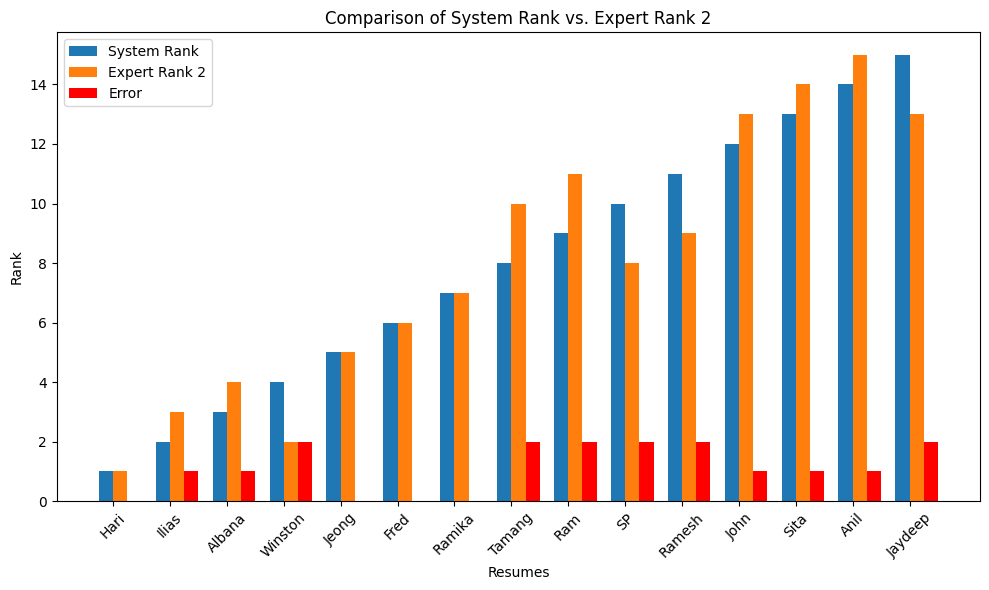

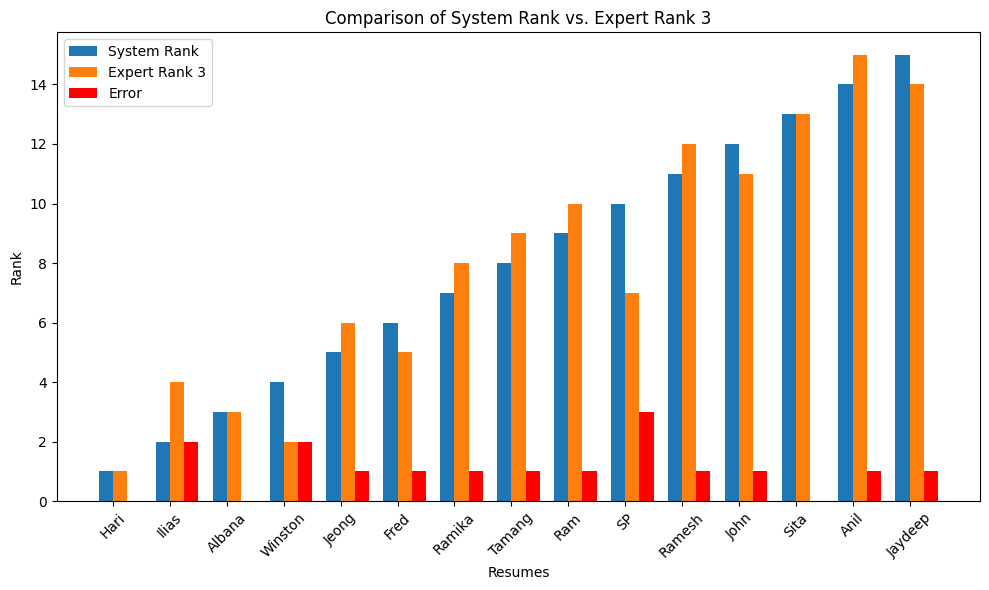

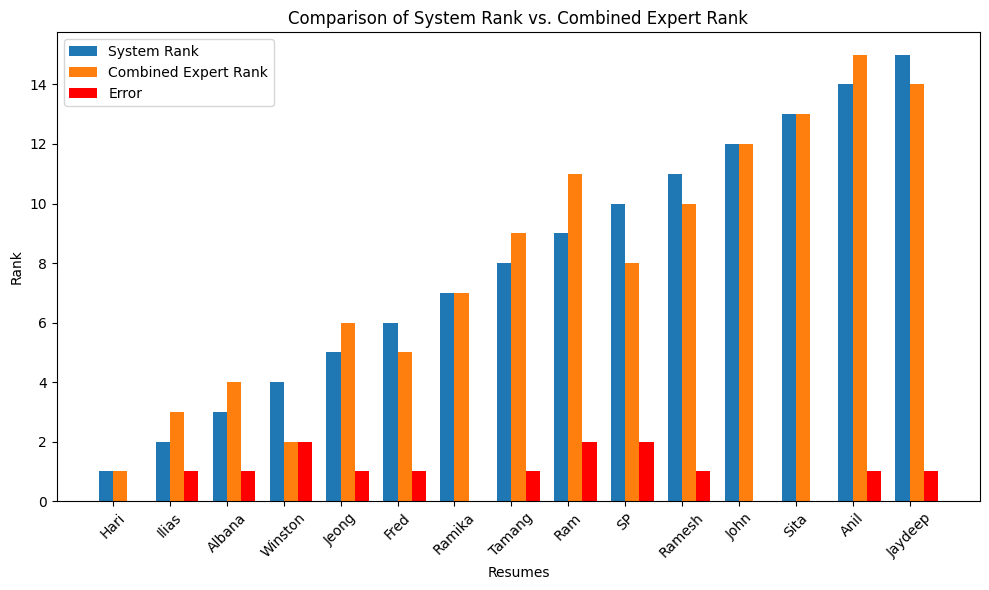

In [41]:
def plot_rank_comparison(df, expert_column, label):
    plt.figure(figsize=(10, 6))

    bar_width = 0.25
    index = range(len(df))

    # Calculate the absolute difference between system rank and expert rank
    absolute_difference = abs(df['system_rank'] - df[expert_column])

    plt.bar(index, df['system_rank'], bar_width, label='System Rank')
    plt.bar([i + bar_width for i in index], df[expert_column], bar_width, label=label)
    plt.bar([i + 2 * bar_width for i in index], absolute_difference, bar_width, label='Error', color='red')

    plt.xlabel('Resumes')
    plt.ylabel('Rank')
    plt.title('Comparison of System Rank vs. ' + label)
    plt.xticks([i + bar_width / 2 for i in index], df['Filename'], rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
plot_rank_comparison(df1, 'expert_rank_1', 'Expert Rank 1')
plot_rank_comparison(df1, 'expert_rank_2', 'Expert Rank 2')
plot_rank_comparison(df1, 'expert_rank_3', 'Expert Rank 3')
plot_rank_comparison(df1, 'combined_expert_rank', 'Combined Expert Rank')


In [42]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error
mae = mean_absolute_error(df1['system_rank'], df1['combined_expert_rank'])
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.9333333333333333


MAE may not be appropriate

**Kendall's Tau rank correlation coefficient**  
measures the similarity of the ordering of data points between two rankings. It considers pairs of data points and assesses whether their relative ordering is the same in both rankings. 

In [43]:
from scipy.stats import kendalltau

# Calculate Kendall's Tau coefficient
tau, p_value = kendalltau(df1['system_rank'], df1['combined_expert_rank'])
print("Kendall's Tau Coefficient:", tau)

Kendall's Tau Coefficient: 0.8666666666666667


A score of 0.86 indicates a strong positive correlation between the rankings assigned by your system and those provided by human experts.
While slightly lower than the Spearman correlation coefficient, it still suggests a significant level of agreement between the rankings.

**Spearman's Rank Correlation Coefficient:**  
Similar to Kendall's Tau, Spearman's rank correlation coefficient measures the strength and direction of association between rankings. It emphasizes the magnitude of differences between ranks and is useful for evaluating the consistency of rankings.

In [44]:
from scipy.stats import spearmanr

# Calculate Spearman's rank correlation coefficient
correlation_coefficient, p_value = spearmanr(df1['system_rank'], df1['combined_expert_rank'])
print("Spearman's Rank Correlation Coefficient:", correlation_coefficient)

Spearman's Rank Correlation Coefficient: 0.9642857142857141


A score of 0.95 indicates a very strong positive correlation between the rankings assigned by your system and those provided by human experts.
This means that the rankings from your system closely match the rankings provided by human experts, with very little discrepancy.

In [45]:
def precision_at_k(system_rankings, human_rankings, k):
    """
    Calculate precision at K.

    Parameters:
    system_rankings (list): List of system rankings (ground truth).
    human_rankings (list): List of human rankings.
    k (int): Top K rankings to consider.

    Returns:
    precision (float): Precision at K.
    """
    # Get the top K rankings
    top_k_human = human_rankings[:k]
    top_k_system = system_rankings[:k]

    # Count the number of relevant items among the top K predicted rankings
    relevant_count = sum(1 for ranking in top_k_human if ranking in top_k_system)

    # Calculate precision at K
    precision = relevant_count / k if k > 0 else 0  # Prevent division by zero

    return precision

k = 5
precision = precision_at_k(df1['system_rank'].tolist(), df1['combined_expert_rank'].tolist(), k)
print("Precision at K:", precision)


Precision at K: 0.8


In [46]:
def precision_at_k_lowest(system_rankings, human_rankings, k):
    """
    Calculate precision at K for the lowest ranked resumes.

    Parameters:
    system_rankings (list): List of system rankings (ground truth).
    human_rankings (list): List of human rankings.
    k (int): Top K rankings to consider.

    Returns:
    precision (float): Precision at K for the lowest ranked resumes.
    """
    # Get the bottom K rankings
    bottom_k_human = human_rankings[-k:]
    bottom_k_system = system_rankings[-k:]

    # Count the number of relevant items among the bottom K human rankings
    relevant_count = sum(1 for ranking in bottom_k_system if ranking in bottom_k_human)

    # Calculate precision at K
    precision = relevant_count / k if k > 0 else 0  # Prevent division by zero

    return precision

k = 5  # Bottom K rankings to consider

precision_lowest = precision_at_k_lowest(df1['system_rank'].tolist(), df1['combined_expert_rank'].tolist(), k)
print("Precision at K for lowest ranked resumes:", precision_lowest)


Precision at K for lowest ranked resumes: 0.8


In [47]:
# Create DataFrame for performance metrics
performance_data = {
    "Metric": ["Kendall's Tau Coefficient", "Spearman's Rank Correlation Coefficient", "Precision at K", "Precision at K for lowest ranked resumes"],
    "Value": [tau, correlation_coefficient, precision, precision_lowest]
}

performance_df = pd.DataFrame(performance_data)

# Display the DataFrame
performance_df


,Metric,Value
0,Kendall's Tau Coefficient,0.866667
1,Spearman's Rank Correlation Coefficient,0.964286
2,Precision at K,0.800000
3,Precision at K for lowest ranked resumes,0.800000


In [48]:
import pandas as pd
from scipy.stats import kendalltau, spearmanr

def calculate_correlation(df, rank_column, expert_columns):
    tau_values = []
    spearman_values = []

    for expert_column in expert_columns:
        # Calculate Kendall's Tau coefficient
        tau, _ = kendalltau(df[rank_column], df[expert_column])
        tau_values.append(tau)

        # Calculate Spearman's rank correlation coefficient
        spearman_coefficient, _ = spearmanr(df[rank_column], df[expert_column])
        spearman_values.append(spearman_coefficient)

    return tau_values, spearman_values

# Example usage:
expert_columns = ['expert_rank_1', 'expert_rank_2', 'expert_rank_3', 'combined_expert_rank']
rank_column = 'system_rank'

# Create a DataFrame with rows representing the expert columns
correlation_df = pd.DataFrame({'Expert Column': expert_columns})

# Calculate correlation coefficients
tau_values, spearman_values = calculate_correlation(df1, rank_column, expert_columns)

# Add the coefficients to the DataFrame
correlation_df["Kendall's Tau Coefficient"] = tau_values
correlation_df["Spearman's Rank Correlation Coefficient"] = spearman_values

correlation_df


,Expert Column,Kendall's Tau Coefficient,Spearman's Rank Correlation Coefficient
0,expert_rank_1,0.866667,0.967857
1,expert_rank_2,0.842115,0.945487
2,expert_rank_3,0.828571,0.953571
3,combined_expert_rank,0.866667,0.964286


In [49]:
def precision_at_k_all(df, rank_column, expert_columns, k=5):
    pk_lowest_values = []
    pk_values = []
    
    for expert_column in expert_columns:
        precision = precision_at_k(df[rank_column].tolist(), df[expert_column].tolist(), k)
        precision_lowest = precision_at_k_lowest(df[rank_column].tolist(), df[expert_column].tolist(), k)
        pk_values.append(precision)
        pk_lowest_values.append(precision_lowest)
    
    return pk_values, pk_lowest_values

# Assuming precision_at_k_lowest is already defined somewhere
# Example usage:
expert_columns = ['expert_rank_1', 'expert_rank_2', 'expert_rank_3', 'combined_expert_rank']
rank_column = 'system_rank'

pk_values, pk_lowest_values = precision_at_k_all(df1, rank_column, expert_columns)

correlation_df['Precision at K'] = pk_values
correlation_df['Precision at K for lowest ranked resumes'] = pk_lowest_values


In [50]:
correlation_df

,Expert Column,Kendall's Tau Coefficient,Spearman's Rank Correlation Coefficient,Precision at K,Precision at K for lowest ranked resumes
0,expert_rank_1,0.866667,0.967857,0.8,0.8
1,expert_rank_2,0.842115,0.945487,1.0,0.6
2,expert_rank_3,0.828571,0.953571,0.8,1.0
3,combined_expert_rank,0.866667,0.964286,0.8,0.8
